# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 343 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 52.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 70.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 45.7 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 60.2 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 64.5 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 65.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 68.0 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 65.9 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 70.5 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.7 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=3fea9bed06664592b990d3283a83f01004b88d77023e0e746d3a793c725dd15b
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
# Specify the device for computation based on GPU availability, 'cuda' if GPU is available, else use CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define a transform to preprocess the data before training 
# Convert the image to a tensor and normalize it
transform_data = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

transform_data

Compose(
    ToTensor()
    Normalize(mean=0.5, std=0.5)
)

In [4]:
# Create a training dataset
training_data = torchvision.datasets.MNIST('/mnist_data/training', 
                                    download=True, 
                                    train=True, 
                                    transform=transform_data)

print(training_data.data.shape)
print(training_data)

# Create a training data loader along with specifying parameters for the data loader
training_loader = torch.utils.data.DataLoader(training_data, 
                                batch_size=64, shuffle=True)

print(training_loader)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /mnist_data/training/MNIST/raw/train-images-idx3-ubyte.gz to /mnist_data/training/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /mnist_data/training/MNIST/raw/train-labels-idx1-ubyte.gz to /mnist_data/training/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /mnist_data/training/MNIST/raw/t10k-images-idx3-ubyte.gz to /mnist_data/training/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /mnist_data/training/MNIST/raw/t10k-labels-idx1-ubyte.gz to /mnist_data/training/MNIST/raw

torch.Size([60000, 28, 28])
Dataset MNIST
    Number of datapoints: 60000
    Root location: /mnist_data/training
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


In [5]:
# Create a testing dataset
testing_data = torchvision.datasets.MNIST('/mnist_data/testing', 
                                    download=True, 
                                    train=False, 
                                    transform=transform_data)

print(testing_data.data.shape)
print(testing_data)

# Create a testing data loader along with specifying parameters for the data loader
testing_loader = torch.utils.data.DataLoader(testing_data, 
                                batch_size=64, shuffle=False)

print(testing_loader)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /mnist_data/testing/MNIST/raw/train-images-idx3-ubyte.gz to /mnist_data/testing/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /mnist_data/testing/MNIST/raw/train-labels-idx1-ubyte.gz to /mnist_data/testing/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /mnist_data/testing/MNIST/raw/t10k-images-idx3-ubyte.gz to /mnist_data/testing/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /mnist_data/testing/MNIST/raw/t10k-labels-idx1-ubyte.gz to /mnist_data/testing/MNIST/raw

torch.Size([10000, 28, 28])
Dataset MNIST
    Number of datapoints: 10000
    Root location: /mnist_data/testing
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**The transforms has been applied to convert images to PyTorch tensors for compatibility and normalize them with a mean of 0.5 and standard deviation of 0.5, facilitating efficient model training.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


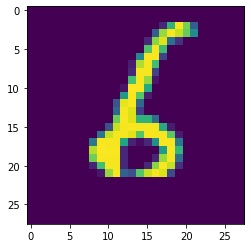

2


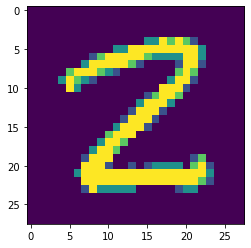

9


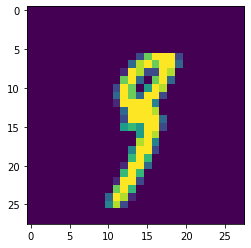

2


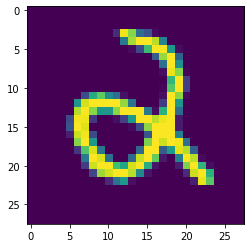

3


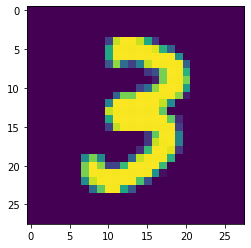

In [7]:
# Explore data
# Display five samples from the testing loader
show5(training_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [13]:
## YOUR CODE HERE ##

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # First fully connected layer (input: 28*28 = 784, output: 512)
        self.f1 = nn.Linear(784, 512)
        # Second fully connected layer (input: 512, output: 512)
        self.f2 = nn.Linear(512, 512)
        # Final fully connected layer that produces the classification output '10 classes' (input: 512, output: 10)
        self.f3 = nn.Linear(512, 10)
        # Dropout layer with a probability of 0.2 for regularization
        self.dropout = nn.Dropout(p = 0.2)
        
    def forward(self, x):
        # Reshaping tensor x to have a second dimension of 28*28,
        # allowing PyTorch to automatically infer the first dimension (-1)
        x = x.view(-1, 784)
        # Pass input x through 1st linear layer, apply ReLU activation function and dropout for regularization
        x = self.dropout(F.relu(self.f1(x)))
        # Pass input x through 2nd linear layer, apply ReLU activation function and dropout for regularization
        x = self.dropout(F.relu(self.f2(x)))
        # Apply softmax activation to the output logits from the final linear layer
        x = F.softmax(self.f3(x), dim=1)
        # Output the final result after passing through the neural network layers
        return x

# Instantiate the neural network model
net = Net()
# Move the neural network model 'net' to the specified device (CPU or GPU)
net.to(device)

Net(
  (f1): Linear(in_features=784, out_features=512, bias=True)
  (f2): Linear(in_features=512, out_features=512, bias=True)
  (f3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

**Cross Entropy Loss function is commonly used for classification tasks, where the model is tasked to predict among multiple classes.**

In [14]:
# Define loss function as Cross Entropy Loss for classification
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()

# Define optimizer as SGD for updating the model parameters, with Learning rate of 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [15]:
def training_model(num_epochs):
    # Loop through the specified number of epochs
    for epoch in range(num_epochs):
        # Initialize training_loss for each epoch
        training_loss = 0
        # Iterate through the training data batches using tqdm for progress visualization
        for i, (inputs, labels) in tqdm(enumerate(training_loader), total=len(training_loader)):
            # Move the inputs and labels to the specified device (CPU or GPU)
            inputs, labels = inputs.to(device), labels.to(device)
            # Clear previously calculated gradients to prevent accumulation
            optimizer.zero_grad()
            # Perform a forward pass of the inputs through the model
            outputs = net(inputs)
            # Calculate loss based on the model's output and true labels
            loss = criterion(outputs, labels)
            # Perform backpropagation to compute gradients of the loss with respect to model parameters
            loss.backward()
            # Update model parameters using the computed gradients and the chosen optimizer
            optimizer.step()
            # Accumulate loss value for the current batch to calculate the total training loss
            training_loss += loss.item()
            
        # Print average training loss for the current epoch
        print(f'Epoch: {epoch + 1}, Training Loss: {training_loss / 100:.3f}')

# Call training model function with 20 epochs
training_model(20)

100%|██████████| 938/938 [00:12<00:00, 74.15it/s]


Epoch: 1, Training Loss: 21.579


100%|██████████| 938/938 [00:11<00:00, 80.15it/s]


Epoch: 2, Training Loss: 21.554


100%|██████████| 938/938 [00:11<00:00, 80.91it/s]


Epoch: 3, Training Loss: 21.525


100%|██████████| 938/938 [00:11<00:00, 78.20it/s]


Epoch: 4, Training Loss: 21.489


100%|██████████| 938/938 [00:11<00:00, 79.47it/s]


Epoch: 5, Training Loss: 21.438


100%|██████████| 938/938 [00:11<00:00, 78.88it/s]


Epoch: 6, Training Loss: 21.353


100%|██████████| 938/938 [00:12<00:00, 76.91it/s]


Epoch: 7, Training Loss: 21.226


100%|██████████| 938/938 [00:12<00:00, 77.55it/s]


Epoch: 8, Training Loss: 21.077


100%|██████████| 938/938 [00:11<00:00, 78.84it/s]


Epoch: 9, Training Loss: 20.897


100%|██████████| 938/938 [00:12<00:00, 77.54it/s]


Epoch: 10, Training Loss: 20.664


100%|██████████| 938/938 [00:14<00:00, 66.51it/s]


Epoch: 11, Training Loss: 20.390


100%|██████████| 938/938 [00:14<00:00, 66.57it/s]


Epoch: 12, Training Loss: 20.134


100%|██████████| 938/938 [00:14<00:00, 64.68it/s]


Epoch: 13, Training Loss: 19.910


100%|██████████| 938/938 [00:14<00:00, 65.13it/s]


Epoch: 14, Training Loss: 19.671


100%|██████████| 938/938 [00:14<00:00, 65.11it/s]


Epoch: 15, Training Loss: 19.408


100%|██████████| 938/938 [00:14<00:00, 64.24it/s]


Epoch: 16, Training Loss: 19.117


100%|██████████| 938/938 [00:14<00:00, 64.24it/s]


Epoch: 17, Training Loss: 18.794


100%|██████████| 938/938 [00:14<00:00, 66.04it/s]


Epoch: 18, Training Loss: 18.510


100%|██████████| 938/938 [00:13<00:00, 67.50it/s]


Epoch: 19, Training Loss: 18.290


100%|██████████| 938/938 [00:14<00:00, 65.16it/s]

Epoch: 20, Training Loss: 18.120


Plot the training loss (and validation loss/accuracy, if recorded).

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [16]:
# Initialize counter for correct predictions in testing dataset
testing_correct = 0
# Initialize counter for total samples in testing dataset
testing_total = 0

# Disable gradient calculation for evaluation
with torch.no_grad():
    # Iterate through testing data
    for (inputs, labels) in testing_loader:
        # Move the inputs and labels to the specified device (CPU or GPU)
        inputs, labels = inputs.to(device), labels.to(device)
        # Forward pass
        outputs = net(inputs)
        # Get predicted labels by selecting the maximum output
        prediction = outputs.argmax(1)
        # Update total count of samples
        testing_total += labels.size(0)
        # Update count of correct predictions
        testing_correct += (prediction == labels).sum().item()

# Calculate the accuracy on the testing dataset
accuracy = 100 * testing_correct / testing_total
# Print the accuracy on the testing dataset
print(f'Accuracy on Test dataset = {accuracy:.2f}%')

Accuracy on Test dataset = 56.75%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [20]:
## YOUR CODE HERE ##

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # First fully connected layer (input: 28*28 = 784, output: 128)
        self.f1 = nn.Linear(784, 128)
        # Second fully connected layer (input: 128, output: 64)
        self.f2 = nn.Linear(128, 64)
        # Final fully connected layer that produces the classification output '10 classes' (input: 64, output: 10)
        self.f3 = nn.Linear(64, 10)
        # Dropout layer with a probability of 0.2 for regularization
        self.dropout = nn.Dropout(p = 0.2)
        
    def forward(self, x):
        # Reshaping tensor x to have a second dimension of 28*28,
        # allowing PyTorch to automatically infer the first dimension (-1)
        x = x.view(-1, 784)
        # Pass input x through 1st linear layer, apply ReLU activation function and dropout for regularization
        x = self.dropout(F.relu(self.f1(x)))
        # Pass input x through 2nd linear layer, apply ReLU activation function and dropout for regularization
        x = self.dropout(F.relu(self.f2(x)))
        # Compute log probabilities using log_softmax to obtain more numerically stable probabilities for predictions
        x = F.log_softmax(self.f3(x), dim=1)
        # Output the final result after passing through the layers
        return x

# Instantiate the neural network model
net = Net()
# Move the model 'net' to the specified device (CPU or GPU)
net.to(device)

Net(
  (f1): Linear(in_features=784, out_features=128, bias=True)
  (f2): Linear(in_features=128, out_features=64, bias=True)
  (f3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

**Negative Log Likelihood Loss function is commonly used for classification tasks, especially when the final activation function of the network is log_softmax.**

In [21]:
# Define the loss function as NLLLoss for classification
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# Define optimizer as SGD for updating the model parameters, with Learning rate of 0.003
optimizer = torch.optim.SGD(net.parameters(), lr=0.003)

In [22]:
def training_model(num_epochs):
    # Loop through the specified number of epochs
    for epoch in range(num_epochs):
        # Initialize training_loss for each epoch
        training_loss = 0
        # Iterate through the training data batches using tqdm for progress visualization
        for i, (inputs, labels) in tqdm(enumerate(training_loader), total=len(training_loader)):
            # Move the inputs and labels to the specified device (CPU or GPU)
            inputs, labels = inputs.to(device), labels.to(device)
            # Clear previously calculated gradients to prevent accumulation
            optimizer.zero_grad()
            # Perform a forward pass of the inputs through the model
            outputs = net(inputs)
            # Calculate loss based on the model's output and true labels
            loss = criterion(outputs, labels)
            # Perform backpropagation to compute gradients of the loss with respect to model parameters
            loss.backward()
            # Update model parameters using the computed gradients and the chosen optimizer
            optimizer.step()
            # Accumulate loss value for the current batch to calculate the total training loss
            training_loss += loss.item()
            
        # Print average training loss for the current epoch
        print(f'Epoch: {epoch + 1}, Training Loss: {training_loss / 100:.3f}')

# Call training model function with 50 epochs
training_model(50)

100%|██████████| 938/938 [00:14<00:00, 66.91it/s]


Epoch: 1, Training Loss: 18.303


100%|██████████| 938/938 [00:14<00:00, 65.60it/s]


Epoch: 2, Training Loss: 9.717


100%|██████████| 938/938 [00:13<00:00, 67.48it/s]


Epoch: 3, Training Loss: 6.607


100%|██████████| 938/938 [00:14<00:00, 65.60it/s]


Epoch: 4, Training Loss: 5.446


100%|██████████| 938/938 [00:14<00:00, 65.14it/s]


Epoch: 5, Training Loss: 4.805


100%|██████████| 938/938 [00:14<00:00, 65.15it/s]


Epoch: 6, Training Loss: 4.385


100%|██████████| 938/938 [00:14<00:00, 65.59it/s]


Epoch: 7, Training Loss: 4.157


100%|██████████| 938/938 [00:14<00:00, 65.56it/s]


Epoch: 8, Training Loss: 3.891


100%|██████████| 938/938 [00:14<00:00, 63.42it/s]


Epoch: 9, Training Loss: 3.733


100%|██████████| 938/938 [00:14<00:00, 64.70it/s]


Epoch: 10, Training Loss: 3.529


100%|██████████| 938/938 [00:13<00:00, 67.50it/s]


Epoch: 11, Training Loss: 3.424


100%|██████████| 938/938 [00:14<00:00, 64.70it/s]


Epoch: 12, Training Loss: 3.305


100%|██████████| 938/938 [00:14<00:00, 63.85it/s]


Epoch: 13, Training Loss: 3.153


100%|██████████| 938/938 [00:14<00:00, 63.83it/s]


Epoch: 14, Training Loss: 3.085


100%|██████████| 938/938 [00:14<00:00, 63.83it/s]


Epoch: 15, Training Loss: 2.979


100%|██████████| 938/938 [00:14<00:00, 64.29it/s]


Epoch: 16, Training Loss: 2.886


100%|██████████| 938/938 [00:14<00:00, 64.67it/s]


Epoch: 17, Training Loss: 2.809


100%|██████████| 938/938 [00:14<00:00, 64.22it/s]


Epoch: 18, Training Loss: 2.724


100%|██████████| 938/938 [00:13<00:00, 67.96it/s]


Epoch: 19, Training Loss: 2.623


100%|██████████| 938/938 [00:14<00:00, 63.85it/s]


Epoch: 20, Training Loss: 2.596


100%|██████████| 938/938 [00:14<00:00, 64.20it/s]


Epoch: 21, Training Loss: 2.521


100%|██████████| 938/938 [00:14<00:00, 65.20it/s]


Epoch: 22, Training Loss: 2.473


100%|██████████| 938/938 [00:14<00:00, 64.69it/s]


Epoch: 23, Training Loss: 2.399


100%|██████████| 938/938 [00:14<00:00, 63.83it/s]


Epoch: 24, Training Loss: 2.349


100%|██████████| 938/938 [00:14<00:00, 66.09it/s]


Epoch: 25, Training Loss: 2.299


100%|██████████| 938/938 [00:14<00:00, 66.10it/s]


Epoch: 26, Training Loss: 2.239


100%|██████████| 938/938 [00:13<00:00, 68.01it/s]


Epoch: 27, Training Loss: 2.189


100%|██████████| 938/938 [00:14<00:00, 64.27it/s]


Epoch: 28, Training Loss: 2.146


100%|██████████| 938/938 [00:14<00:00, 66.07it/s]


Epoch: 29, Training Loss: 2.112


100%|██████████| 938/938 [00:14<00:00, 63.83it/s]


Epoch: 30, Training Loss: 2.064


100%|██████████| 938/938 [00:14<00:00, 63.78it/s]


Epoch: 31, Training Loss: 2.024


100%|██████████| 938/938 [00:14<00:00, 64.27it/s]


Epoch: 32, Training Loss: 1.986


100%|██████████| 938/938 [00:14<00:00, 64.26it/s]


Epoch: 33, Training Loss: 1.943


100%|██████████| 938/938 [00:14<00:00, 63.80it/s]


Epoch: 34, Training Loss: 1.913


100%|██████████| 938/938 [00:14<00:00, 66.04it/s]


Epoch: 35, Training Loss: 1.897


100%|██████████| 938/938 [00:14<00:00, 62.96it/s]


Epoch: 36, Training Loss: 1.847


100%|██████████| 938/938 [00:14<00:00, 62.98it/s]


Epoch: 37, Training Loss: 1.804


100%|██████████| 938/938 [00:14<00:00, 64.70it/s]


Epoch: 38, Training Loss: 1.797


100%|██████████| 938/938 [00:14<00:00, 65.12it/s]


Epoch: 39, Training Loss: 1.769


100%|██████████| 938/938 [00:15<00:00, 60.93it/s]


Epoch: 40, Training Loss: 1.721


100%|██████████| 938/938 [00:14<00:00, 63.39it/s]


Epoch: 41, Training Loss: 1.712


100%|██████████| 938/938 [00:14<00:00, 62.97it/s]


Epoch: 42, Training Loss: 1.687


100%|██████████| 938/938 [00:13<00:00, 68.00it/s]


Epoch: 43, Training Loss: 1.654


100%|██████████| 938/938 [00:14<00:00, 65.58it/s]


Epoch: 44, Training Loss: 1.644


100%|██████████| 938/938 [00:14<00:00, 66.54it/s]


Epoch: 45, Training Loss: 1.629


100%|██████████| 938/938 [00:14<00:00, 66.10it/s]


Epoch: 46, Training Loss: 1.584


100%|██████████| 938/938 [00:14<00:00, 64.27it/s]


Epoch: 47, Training Loss: 1.554


100%|██████████| 938/938 [00:14<00:00, 64.70it/s]


Epoch: 48, Training Loss: 1.562


100%|██████████| 938/938 [00:14<00:00, 63.34it/s]


Epoch: 49, Training Loss: 1.538


100%|██████████| 938/938 [00:14<00:00, 64.77it/s]

Epoch: 50, Training Loss: 1.512


In [23]:
# Initialize counter for correct predictions in testing dataset
testing_correct = 0
# Initialize counter for total samples in testing dataset
testing_total = 0

# Disable gradient calculation for evaluation
with torch.no_grad():
    # Iterate through testing data
    for (inputs, labels) in testing_loader:
        # Move the inputs and labels to the specified device (CPU or GPU)
        inputs, labels = inputs.to(device), labels.to(device)
        # Forward pass
        outputs = net(inputs)
        # Get predicted labels by selecting the maximum output
        prediction = outputs.argmax(1)
        # Update total count of samples
        testing_total += labels.size(0)
        # Update count of correct predictions
        testing_correct += (prediction == labels).sum().item()

# Calculate the accuracy on the testing dataset
accuracy = 100 * testing_correct / testing_total
# Print the accuracy on the testing dataset
print(f'Accuracy on Test dataset = {accuracy:.2f}%')

Accuracy on Test dataset = 94.84%


tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 3, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
7


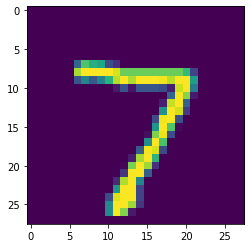

2


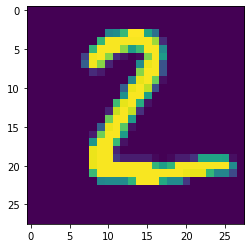

1


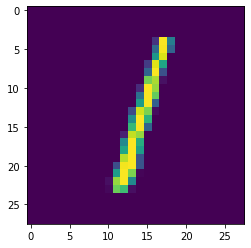

0


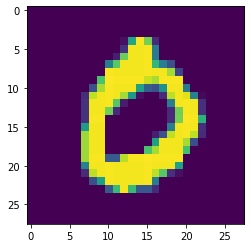

4


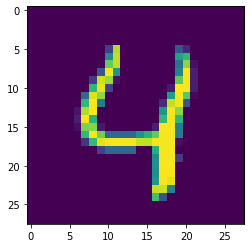

In [24]:
# Fetch a single batch of data from the testing loader
inputs, labels = next(iter(testing_loader))
# Evaluate the model on the fetched batch without gradient calculation
with torch.no_grad():
    # Pass the inputs through the model and get predictions
    pred = net(inputs.to(device))
    # Get the class indices with highest probability
    pred = pred.argmax(1)
    
# Print actual labels and model predictions for the fetched batch
print(labels)
print(pred)

# Display five samples from the testing loader
show5(testing_loader)

## Saving your model
Using `torch.save`, save your model for future loading.

In [25]:
# Save the entire model as a file named mnist_handwritten_digits_model.pt
torch.save(net, "mnist_handwritten_digits_model.pt")

In [26]:
# Load the saved model from mnist_handwritten_digits_model.pt file
model = torch.load("mnist_handwritten_digits_model.pt")

# Set the model to evaluation mode for inference with no gradient calculation
model.eval()

Net(
  (f1): Linear(in_features=784, out_features=128, bias=True)
  (f2): Linear(in_features=128, out_features=64, bias=True)
  (f3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)